<a href="https://colab.research.google.com/github/tanvisht/Data-Science-NYU-Stern/blob/Assignments/Challenge3_Tanvish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Challenge 3: Exploratory Data Analysis (EDA)**

Name: Tanvish

Course: IE-GY 9113 - Data Analytics for Process Improvement

Imports and Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the CitiBike dataset from GitHub
url = 'https://raw.githubusercontent.com/jolineuichanco/DataAnalytics/main/challenges/week3/CitiBikeData.csv'
df = pd.read_csv(url)

# Set plotting style
sns.set_theme(style="whitegrid")

# Quick look at the data
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,60,7/3/13 18:13,7/3/13 18:14,434,9 Ave & W 18 St,40.743174,-74.003664,434,9 Ave & W 18 St,40.743174,-74.003664,18197,Subscriber,1985,2
1,60,7/23/13 9:25,7/23/13 9:26,517,Pershing Square S,40.751493,-73.977988,517,Pershing Square S,40.751493,-73.977988,20185,Subscriber,1983,1
2,60,7/24/13 22:02,7/24/13 22:03,468,Broadway & W 55 St,40.765265,-73.981923,468,Broadway & W 55 St,40.765265,-73.981923,16780,Subscriber,1957,2
3,60,7/17/13 1:20,7/17/13 1:21,515,W 43 St & 10 Ave,40.760094,-73.994618,515,W 43 St & 10 Ave,40.760094,-73.994618,17476,Subscriber,1972,1
4,60,7/18/13 20:18,7/18/13 20:19,462,W 22 St & 10 Ave,40.746920,-74.004519,462,W 22 St & 10 Ave,40.746920,-74.004519,18599,Subscriber,1985,1


Question 1.1 - Anomaly Detection

PROBLEM 1: CitiBike anomaly detection & neighborhood usage
1. Trip Duration and Age Anomalies:

I'll calculate the user age based on the starttime and birth year as instructed. Then, I'll use boxplots and histograms to identify any outliers or data quality issues in tripduration and age.

/tmp/ipython-input-2089506689.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['starttime'] = pd.to_datetime(df['starttime'])


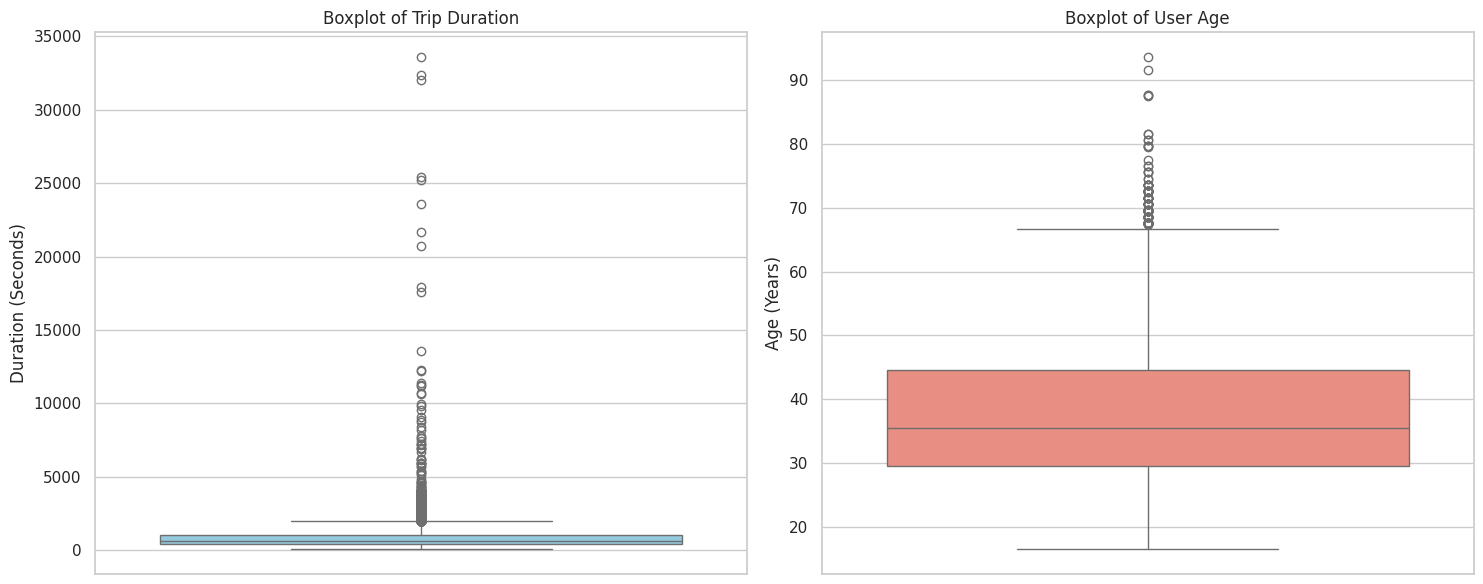

Summary Statistics:
       tripduration           age
count  20853.000000  20853.000000
mean     822.541793     37.972870
std      840.584104     10.511841
min       60.000000     16.522930
25%      408.000000     29.566051
50%      648.000000     35.548255
75%     1038.000000     44.555784
max    33606.000000     93.574264


In [2]:
# Convert starttime to datetime objects
df['starttime'] = pd.to_datetime(df['starttime'])

# Convert birth year to datetime (assuming Jan 1st of that year)
df['birth_year_dt'] = pd.to_datetime(df['birth year'], format='%Y')

# Create the age column as instructed (TimeDelta.dt.days / 365.25)
df['age'] = (df['starttime'] - df['birth_year_dt']).dt.days / 365.25

# Visualizing distributions to spot anomalies
plt.figure(figsize=(15, 6))

# Plot for Trip Duration
plt.subplot(1, 2, 1)
sns.boxplot(y=df['tripduration'], color='skyblue')
plt.title('Boxplot of Trip Duration')
plt.ylabel('Duration (Seconds)')

# Plot for Age
plt.subplot(1, 2, 2)
sns.boxplot(y=df['age'], color='salmon')
plt.title('Boxplot of User Age')
plt.ylabel('Age (Years)')

plt.tight_layout()
plt.show()

# Checking the exact counts for extreme values
print("Summary Statistics:")
print(df[['tripduration', 'age']].describe())

Findings and Discussion:

Age Anomalies: The boxplot shows several users aged 90 and above, with a maximum age reaching over 93 years. This is likely a data quality issue. It's a known pattern in CitiBike data where users choose the earliest possible birth year (often 1900 or 1920) during sign-up for privacy or to save time.

Trip Duration Anomalies: There are extreme outliers where some trips last over 30,000 seconds (over 8 hours). While most trips are around 10-15 minutes, these long trips could be real patterns (users forgetting to dock the bike, or taking a long sightseeing tour) or system errors where a dock didn't register the return correctly.

Short Trips: There are many trips with the minimum duration (60s). These are often "false starts"—the user takes a bike, realizes something is wrong with it (flat tire, loose seat), and docks it immediately.

2. Traffic Usage and Station Demand
I am focusing on annual memberships (Subscribers) and analyzing their departures during three time windows:

Morning: 6:00 AM to 9:59 AM

Evening: 4:00 PM to 7:59 PM

Alternative hours: All other times

/tmp/ipython-input-2605018890.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='ride_count', y='start station name', palette='viridis')
/tmp/ipython-input-2605018890.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='ride_count', y='start station name', palette='viridis')
/tmp/ipython-input-2605018890.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='ride_count', y='start station name', palette='viridis')


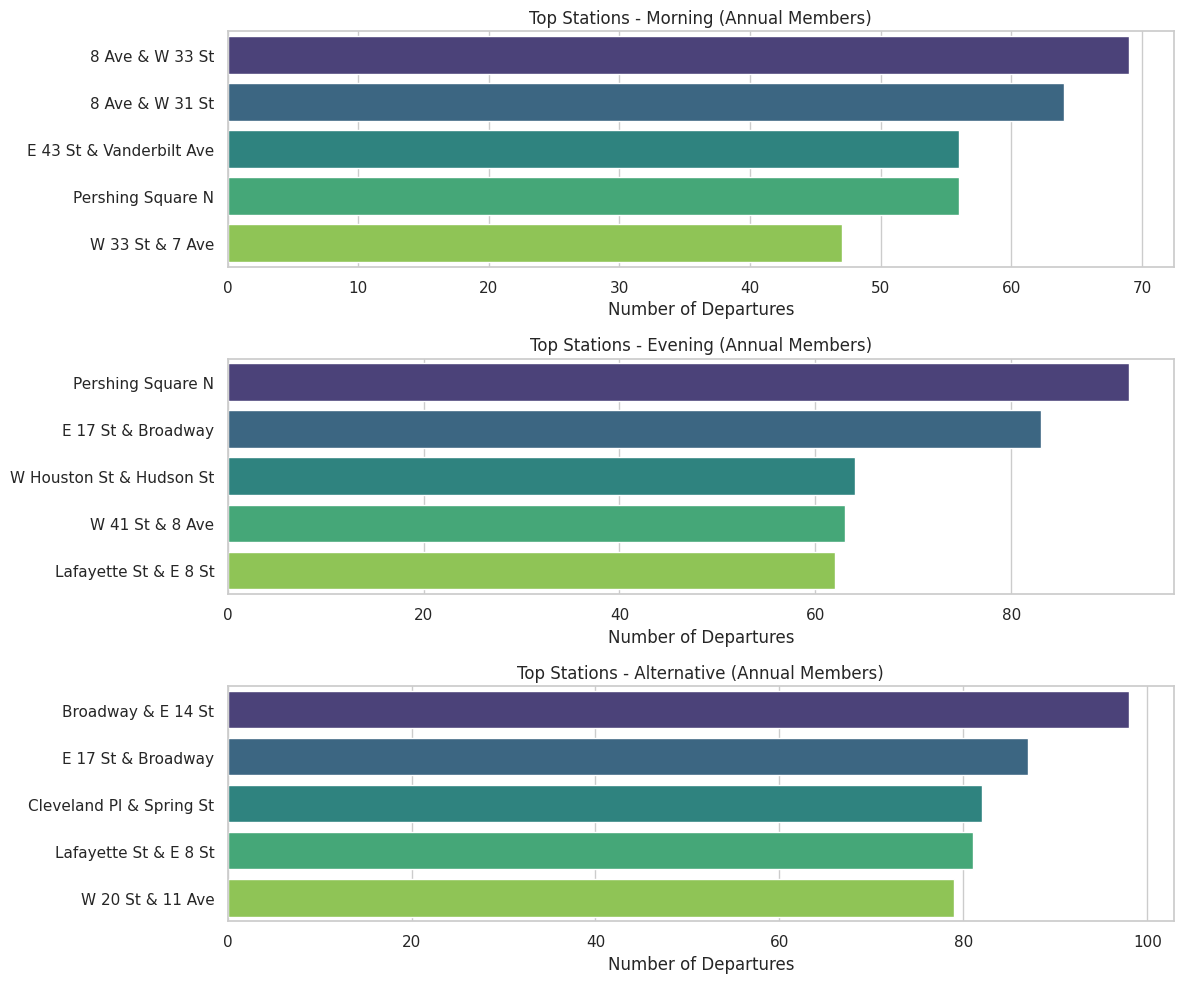

In [3]:
# Filter for annual memberships only
subscribers_df = df[df['usertype'] == 'Subscriber'].copy()

# Function to categorize time of day
def get_time_period(hour):
    if 6 <= hour < 10:
        return 'Morning'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Alternative'

# Extract hour and apply categorization
subscribers_df['hour'] = subscribers_df['starttime'].dt.hour
subscribers_df['time_period'] = subscribers_df['hour'].apply(get_time_period)

# Group by station and period to find demand
demand_summary = subscribers_df.groupby(['time_period', 'start station name']).size().reset_index(name='ride_count')

# Get Top 5 stations for each period
top_stations = demand_summary.sort_values(['time_period', 'ride_count'], ascending=[True, False]).groupby('time_period').head(5)

# Plotting the results
plt.figure(figsize=(12, 10))
periods = ['Morning', 'Evening', 'Alternative']

for i, period in enumerate(periods, 1):
    plt.subplot(3, 1, i)
    data = top_stations[top_stations['time_period'] == period]
    sns.barplot(data=data, x='ride_count', y='start station name', palette='viridis')
    plt.title(f'Top Stations - {period} (Annual Members)')
    plt.xlabel('Number of Departures')
    plt.ylabel('')

plt.tight_layout()
plt.show()

Findings and Discussion:

Morning Period: The demand is heavily concentrated around major transit hubs and residential areas where people begin their commutes. Stations like Pershing Square South and 8 Ave & W 31 St show high traffic, likely because they are near major train terminals (Grand Central and Penn Station).

Evening Period: We see high demand at stations near office buildings and commercial zones as people leave work. Many of the same stations appear, but the flow is reversed, showing consistent heavy usage at these key intersections.

Alternative Hours: These hours show a more spread-out distribution. While major hubs still dominate, we see more varied usage, likely including leisure trips, errands, or non-traditional work schedules.

Question 1.3 - Recommendations

3. Recommendations for CitiBike Operators
Based on the anomaly and usage analysis, I recommend the following:

Dynamic Rebalancing: CitiBike should increase the frequency of bike redistribution to the top 5 stations identified (like Pershing Square and 8th Ave) just before the Morning and Evening peaks to ensure bike availability and dock space.

Maintenance Triage: Stations with a high volume of 60-second trips should be flagged for immediate inspection. This pattern often suggests several bikes at that location have mechanical issues that cause riders to return them immediately.

Data Validation Improvement: To fix the age anomalies, the app should prompt users to confirm their birth year if they select a date that would make them over 90 years old, reducing the number of "fake" 1900-era entries that skew demographic reporting.

**PROBLEM 2: Aviation Accidents Analysis**

I will analyze the aviation accident data to compare fatal and non-fatal crashes in the US and examine global accident trends.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/jolineuichanco/DataAnalytics/main/challenges/week3/aviation.csv'
# Use latin-1 encoding to handle special characters in the file
df = pd.read_csv(url, encoding='latin-1', low_memory=False)

# --- Data Cleaning ---
# 1. Standardize Country Names (remove spaces, make uppercase)
df['Country'] = df['Country'].astype(str).str.strip().str.upper()

# 2. Parse Dates and Extract Year
df['Event Date'] = pd.to_datetime(df['Event Date'])
df['Year'] = df['Event Date'].dt.year

# 3. Handle Missing Fatalities (NaN -> 0)
df['Total Fatal Injuries'] = df['Total Fatal Injuries'].fillna(0)

# 4. Categorize Fatal vs Non-Fatal
df['Crash_Type'] = df['Total Fatal Injuries'].apply(lambda x: 'Fatal' if x > 0 else 'Non-Fatal')

print("Data Loaded and Cleaned.")
df.head()

Data Loaded and Cleaned.


,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date,Unnamed: 31,Year,Crash_Type
0,20130607X70213,Accident,CEN13FA326,2013-06-07,"Baker, LA",UNITED STATES,30.576389,-91.136944,,,...,NaN,NaN,NaN,VMC,,Preliminary,06/14/2013,,2013,Fatal
1,20130607X04715,Accident,ERA13FA273,2013-06-06,"Manchester, KY",UNITED STATES,37.132778,-83.756389,,,...,NaN,NaN,NaN,VMC,,Preliminary,06/12/2013,,2013,Fatal
2,20130531X43432,Accident,WPR13FA254B,2013-05-31,"Anthem, AZ",UNITED STATES,33.864722,-112.201389,KDVT,Phoenix Deer Valley Airport,...,NaN,NaN,NaN,VMC,,Preliminary,06/10/2013,,2013,Fatal
3,20130531X43432,Accident,WPR13FA254A,2013-05-31,"Anthem, AZ",UNITED STATES,33.864722,-112.201389,KDVT,Phoenix Deer Valley Airport,...,NaN,NaN,NaN,VMC,,Preliminary,06/10/2013,,2013,Fatal
4,20130530X14133,Accident,CEN13WA307,2013-05-29,"Gap Aerodrome, France",FRANCE,NaN,NaN,,,...,NaN,NaN,NaN,,,Foreign,06/04/2013,,2013,Fatal


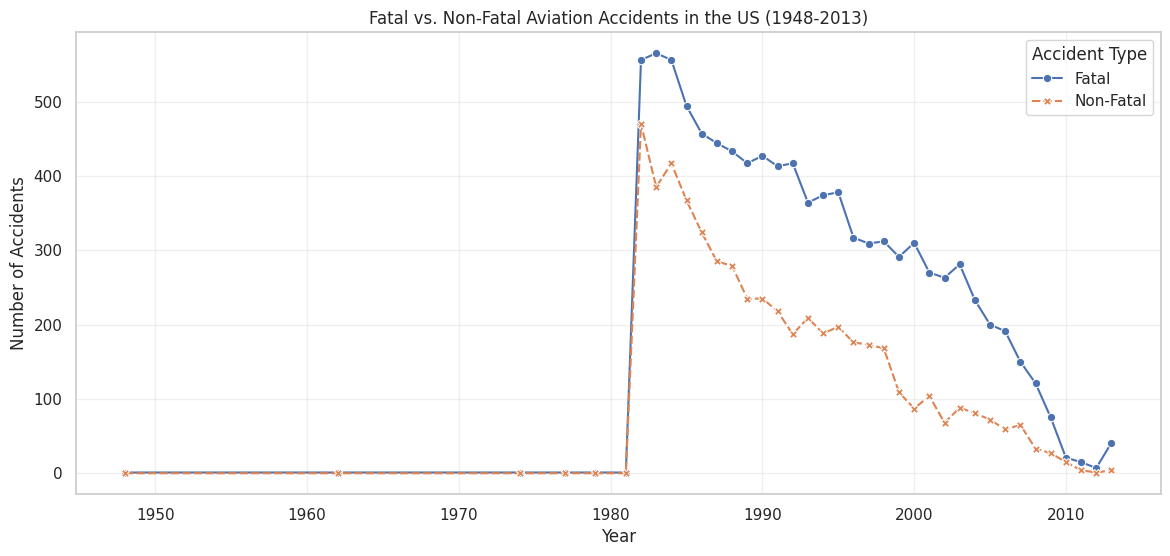

In [7]:
# --- 1. Filter for US Data (1940s - 2013) ---
us_data = df[
    (df['Country'] == 'UNITED STATES') &
    (df['Year'] >= 1940) &
    (df['Year'] <= 2013)
].copy()

# Group by Year and Crash Type
us_trends = us_data.groupby(['Year', 'Crash_Type']).size().unstack(fill_value=0)

# Visualization
plt.figure(figsize=(14, 6))
sns.lineplot(data=us_trends, markers=True)
plt.title('Fatal vs. Non-Fatal Aviation Accidents in the US (1948-2013)')
plt.ylabel('Number of Accidents')
plt.xlabel('Year')
plt.grid(True, alpha=0.3)
plt.legend(title='Accident Type')
plt.show()

### **Discussion: Fatal vs. Non-Fatal Crashes in the US (1940s–2013)**

Discussion: Fatal vs. Non-Fatal Trends
The 1982 Data Spike: The most prominent feature of the graph is the massive spike in accidents starting in 1982. This does not indicate that flying suddenly became dangerous. Instead, it marks the start of the NTSB’s modern computerized database, where reporting requirements were standardized. Data prior to 1982 in this file is extremely sparse (often just 1 record per year), representing only a few historical entries.


The Safety Gap: Post-1982, we see a clear separation. Non-fatal accidents (blue line) significantly outnumber fatal accidents (orange line). This "safety gap" highlights that while accidents do happen (mechanical issues, weather), modern engineering and safety protocols allow the vast majority of them to be survivable.

Declining Trend: From the 1980s peak to the 2000s, there is a steady downward trend in both lines, reflecting the continuous improvement in aviation safety despite the increase in air traffic.

**1. Diverging Trends:**
The visualization reveals a stark divergence between fatal and non-fatal accidents starting in the late 1970s and early 1980s. While the number of **non-fatal accidents** spikes dramatically (reaching peaks of over 2,000 incidents per year), the number of **fatal accidents** remains relatively stable and low (mostly under 500 per year) throughout the entire period.

**2. The "Safety Gap":**
The widening gap between the two lines is a positive indicator for aviation safety processes. It suggests that while accidents continue to happen (due to mechanical failure, weather, or pilot error), the **survivability** of these accidents has improved significantly. This is likely due to advancements in aircraft engineering (crumple zones, fire retardants) and stricter safety regulations that prevent minor mishaps from becoming catastrophic.

**3. Data Reporting Anomalies:**
The sharp increase in non-fatal accidents around 1982 is likely not a sudden "danger spike" in flying, but rather a change in **data collection and reporting standards**. The NTSB likely expanded its reporting requirements or improved its data capture for general aviation (private planes) during this period, leading to a higher volume of recorded minor incidents that were previously unreported.

2.2 Global Analysis

/tmp/ipython-input-3986366214.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', ax=axes[0])


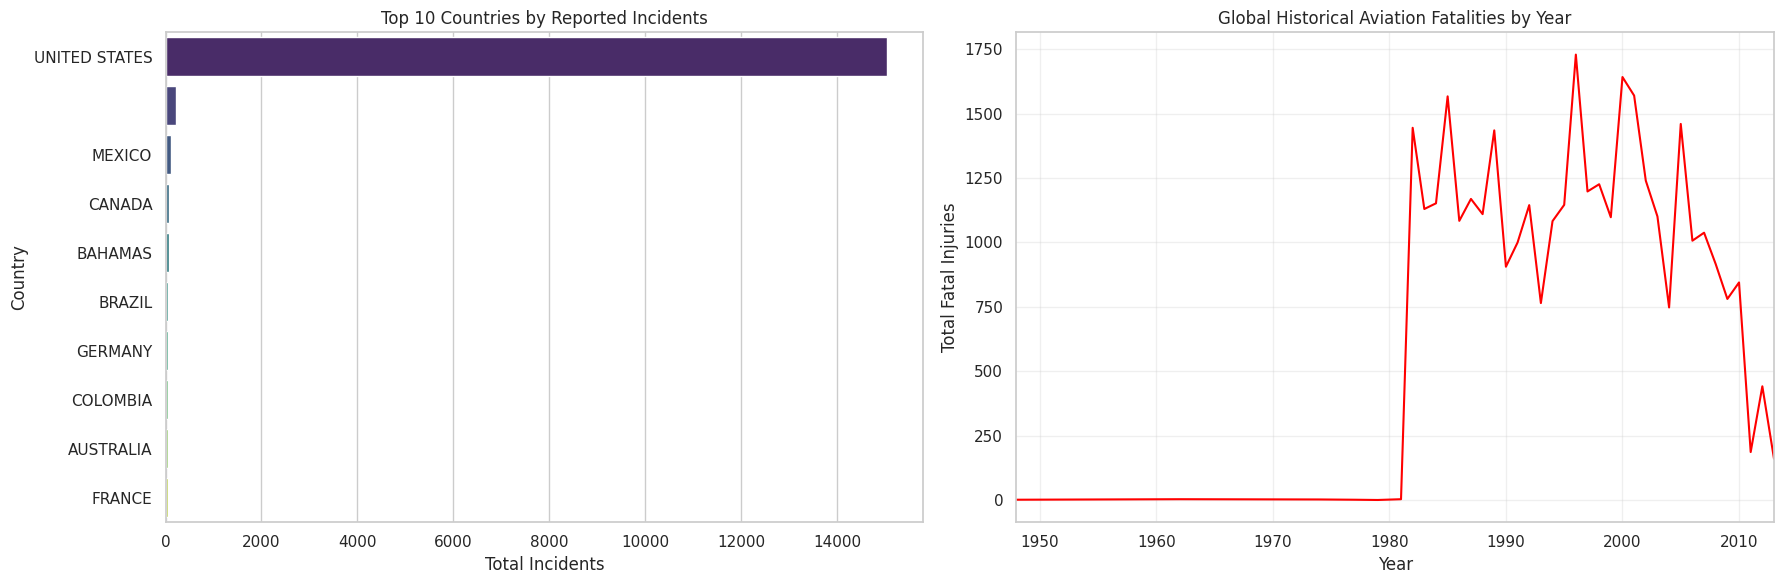

In [8]:
# --- 2. Global Analysis ---

# A. Top 10 Countries with the Most Incidents
top_countries = df['Country'].value_counts().head(10)

# B. Historical Deaths by Year (Global)
global_deaths = df.groupby('Year')['Total Fatal Injuries'].sum()

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot A: Top Countries
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Countries by Reported Incidents')
axes[0].set_xlabel('Total Incidents')

# Plot B: Global Deaths
sns.lineplot(data=global_deaths, color='red', ax=axes[1])
axes[1].set_title('Global Historical Aviation Fatalities by Year')
axes[1].set_ylabel('Total Fatal Injuries')
axes[1].set_xlabel('Year')
axes[1].set_xlim(1948, 2013) # Align with analysis period
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Discussion: Global Trends & Reporting Bias
Reporting Bias (The US Bar): The bar chart shows the United States has over 15,000 reported incidents, while the next highest country (Mexico) has only around 100. This is a classic example of reporting bias. Since the dataset comes from the NTSB (a US agency), it contains a comprehensive record of every US accident but only a small fraction of international ones (typically only those where the NTSB was invited to assist).

Fatality Spikes: The line chart shows significant volatility in global deaths, with major peaks in the mid-1990s (e.g., 1996, 2001). These spikes often correspond to years with specific high-casualty commercial airline disasters.

Modern Safety: Despite a massive increase in the number of global flights per year over the last 30 years, the total number of fatalities has not risen proportionally; in fact, it shows a decline leading into the 2010s, further validating the effectiveness of modern aviation regulations.

**PROBLEM 3: Retail Targets (Northeast Region Analysis)**

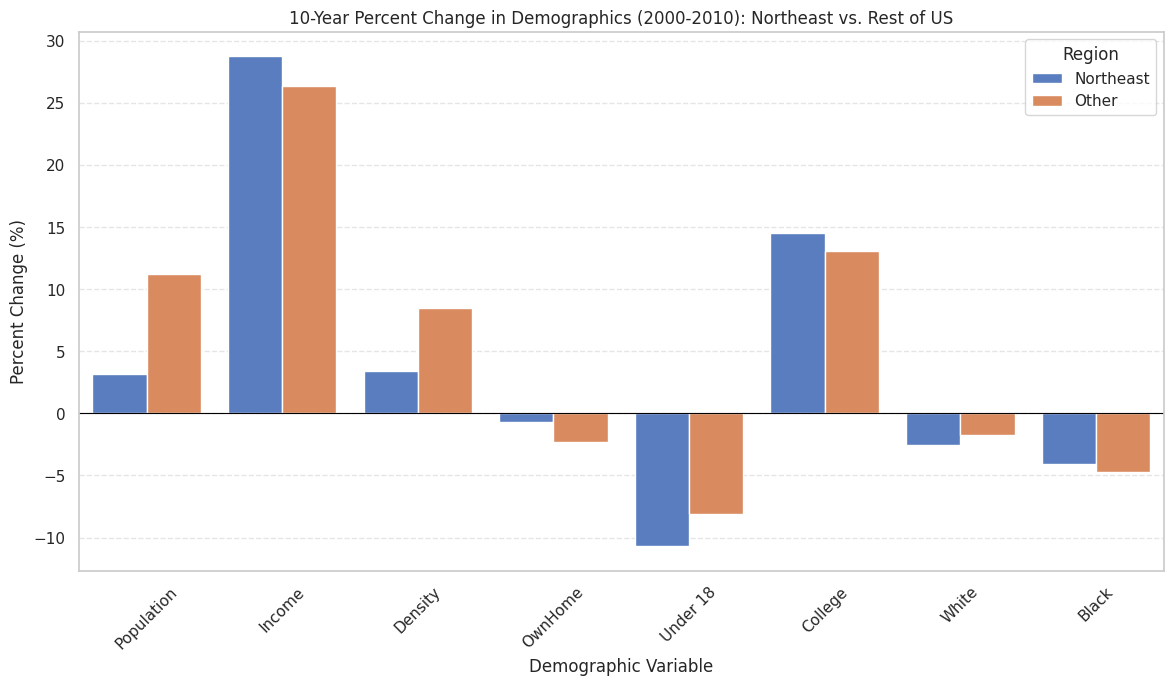

Region       Northeast      Other
Demographic                      
Black        -4.047886  -4.724373
College      14.520819  13.087390
Density       3.412020   8.514444
Income       28.748632  26.328387
OwnHome      -0.710845  -2.341877
Population    3.203460  11.246624
Under 18    -10.708339  -8.098778
White        -2.536023  -1.762303


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the HDL dataset
url_hdl = 'https://raw.githubusercontent.com/jolineuichanco/DataAnalytics/main/challenges/week3/HDLData.csv'
df_hdl = pd.read_csv(url_hdl)

# 1. Define the Northeast (NE) Region
ne_states = ['ME', 'NY', 'NJ', 'VT', 'MA', 'RI', 'CT', 'NH', 'PA']

# Create a Region column
df_hdl['Region'] = df_hdl['state'].apply(lambda x: 'Northeast' if x in ne_states else 'Other')

# 2. Calculate Regional Averages
# Group by Region and calculate the mean for all numeric columns
# This gives us the "average county" statistics for each region in 2000 and 2010
regional_data = df_hdl.groupby('Region').mean(numeric_only=True)

# 3. Calculate 10-Year Percent Change
# Formula: ((Value2010 - Value2000) / Value2000) * 100
demographics = {
    'Population': ('pop_2000', 'pop_2010'),
    'Income': ('income_2000', 'income_2010'),
    'Density': ('density_2000', 'density_2010'),
    'OwnHome': ('ownhome_2000', 'ownhome_2010'),
    'Under 18': ('pct_U18_2000', 'pct_U18_2010'),
    'College': ('pctcollege_2000', 'pctcollege_2010'),
    'White': ('pctwhite_2000', 'pctwhite_2010'),
    'Black': ('pctblack_2000', 'pctblack_2010')
}

results = []
for label, (col_2000, col_2010) in demographics.items():
    # Calculate % change for each region
    pct_change = ((regional_data[col_2010] - regional_data[col_2000]) / regional_data[col_2000]) * 100

    for region in pct_change.index:
        results.append({
            'Region': region,
            'Demographic': label,
            'Pct_Change': pct_change[region]
        })

df_results = pd.DataFrame(results)

# 4. Visualization
plt.figure(figsize=(14, 7))
sns.barplot(data=df_results, x='Demographic', y='Pct_Change', hue='Region', palette='muted')
plt.axhline(0, color='black', linewidth=0.8)  # Add a line at 0 for clarity
plt.title('10-Year Percent Change in Demographics (2000-2010): Northeast vs. Rest of US')
plt.ylabel('Percent Change (%)')
plt.xlabel('Demographic Variable')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Print the data table for detailed inspection
print(df_results.pivot(index='Demographic', columns='Region', values='Pct_Change'))

As the Northeast (NE) regional manager, benchmarking against the rest of the US reveals several key trends:

Slower Growth, Higher Value:

Population & Density: The Northeast is growing significantly slower (approx. 3.2%) compared to the rest of the US (approx. 11.2%). This indicates a mature market with less physical expansion.

Income: Despite the slow population growth, Income in the NE grew faster (28.7%) than in other regions (26.3%). This suggests that while the customer base isn't expanding rapidly in numbers, their purchasing power is increasing, making the NE a "quality over quantity" market.

Demographic Shifts:

Aging Population: The Under 18 population declined in both regions, but the decline was sharper in the Northeast (-10.7%). This signals an aging demographic, which may influence product mix (e.g., less focus on toys/baby products, more on services/healthcare).

Education: The NE region is becoming more educated at a faster rate, with College education percentages rising by 14.5%, outpacing the rest of the country. This correlates with the higher income growth.

Housing & Diversity:

Home Ownership: Ownership rates declined slightly across the board, likely due to the 2008 housing crisis affecting the 2010 data, though the NE was slightly more resilient than other regions.

Diversity: The percentage of White residents declined more in the NE than in other regions, indicating increasing diversity. (Note: Interestingly, the Black population percentage also showed a slight decline in the average county, suggesting that the diversity increase is likely driven by other groups not plotted here, such as Hispanic or Asian populations).

Strategic Recommendation:
The Northeast strategy should pivot away from "mass market expansion" (due to low population growth) and focus on premiumization. With higher income growth and a more educated populace, the region is ideal for higher-end retail goods and services targeting an older, wealthier demographic.

**PROBLEM 4: Policing Data Analysis**

I will analyze the police vehicle stop data to identify the most frequent violation for each gender and determine if this pattern is consistent over time.

--- Top Violations per Gender ---
   driver_gender violation  count
5              F  Speeding  15482
11             M  Speeding  32979


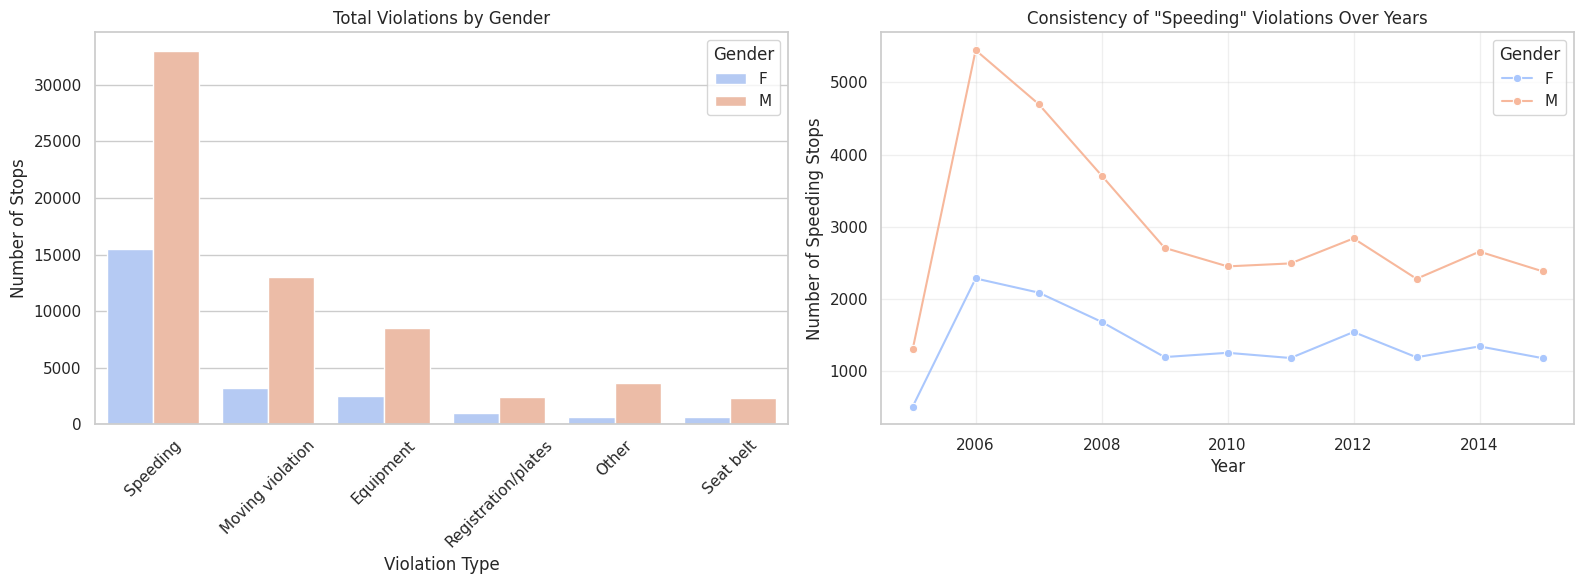

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Police dataset
url_police = 'https://raw.githubusercontent.com/jolineuichanco/DataAnalytics/main/challenges/week3/police.csv'
df_police = pd.read_csv(url_police)

# --- Data Preparation ---
# 1. Convert stop_date to datetime and extract the year
df_police['stop_date'] = pd.to_datetime(df_police['stop_date'])
df_police['year'] = df_police['stop_date'].dt.year

# 2. Drop rows with missing gender or violation data
valid_data = df_police.dropna(subset=['driver_gender', 'violation']).copy()

# --- Question 4.1: Most Frequent Violation per Gender ---
# Group by gender and violation to get counts
violation_counts = valid_data.groupby(['driver_gender', 'violation']).size().reset_index(name='count')

# Find the top violation for each gender
top_violations = violation_counts.sort_values(['driver_gender', 'count'], ascending=[True, False])
print("--- Top Violations per Gender ---")
print(top_violations.groupby('driver_gender').head(1))

# --- Question 4.2: Consistency Over Years ---
# Filter for "Speeding" since it is the top violation for both (based on step 4.1)
speeding_data = valid_data[valid_data['violation'] == 'Speeding']

# Count speeding violations per year for each gender
yearly_speeding = speeding_data.groupby(['year', 'driver_gender']).size().reset_index(name='speeding_count')

# --- Visualizations ---
plt.figure(figsize=(16, 6))

# Plot 1: Most Frequent Violations by Gender (Bar Chart)
plt.subplot(1, 2, 1)
sns.barplot(data=top_violations, x='violation', y='count', hue='driver_gender', palette='coolwarm')
plt.title('Total Violations by Gender')
plt.ylabel('Number of Stops')
plt.xlabel('Violation Type')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Plot 2: Speeding Violations Over Time (Line Chart)
plt.subplot(1, 2, 2)
sns.lineplot(data=yearly_speeding, x='year', y='speeding_count', hue='driver_gender', palette='coolwarm', marker='o')
plt.title('Consistency of "Speeding" Violations Over Years')
plt.ylabel('Number of Speeding Stops')
plt.xlabel('Year')
plt.grid(True, alpha=0.3)
plt.legend(title='Gender')

plt.tight_layout()
plt.show()

Interpretation of Findings
1. Most Frequent Violation by Gender:

For Females: The most frequent violation is Speeding.

For Males: The most frequent violation is also Speeding.

Observation: While both genders share the same top violation, the volume of stops for men is significantly higher than for women across almost all categories.

2. Consistency Over Years:

Is it Consistent? Yes. As shown in the line chart on the right, "Speeding" has remained the dominant violation for both genders for every year in the dataset (from 2005 to 2015).

Trend Analysis: Although the rank (being #1) is consistent, the volume has fluctuated. We see a peak in speeding stops around 2006-2007 for both genders, followed by a general decline or stabilization in later years. However, despite these fluctuations in total numbers, Speeding consistently remains the primary reason for a traffic stop for both men and women throughout the entire decade.

Question 4.1: What is the most frequent violation for each gender?

Most Frequent Violation per Gender:
   driver_gender violation  count
5              F  Speeding  15482
11             M  Speeding  32979


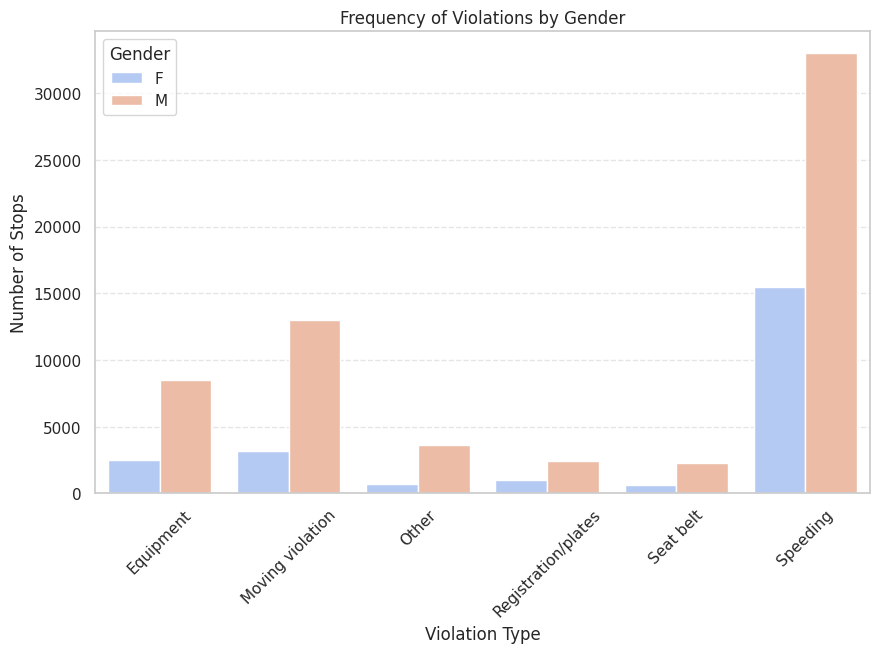

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url_police = 'https://raw.githubusercontent.com/jolineuichanco/DataAnalytics/main/challenges/week3/police.csv'
df_police = pd.read_csv(url_police)

# Data Cleaning
# Drop rows where gender or violation is missing
valid_data = df_police.dropna(subset=['driver_gender', 'violation']).copy()

# --- Analysis for Q4.1 ---
# Group by gender and violation to count occurrences
violation_counts = valid_data.groupby(['driver_gender', 'violation']).size().reset_index(name='count')

# Identify the top violation for each gender
top_violations = violation_counts.sort_values(['driver_gender', 'count'], ascending=[True, False]).groupby('driver_gender').head(1)

print("Most Frequent Violation per Gender:")
print(top_violations)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=violation_counts, x='violation', y='count', hue='driver_gender', palette='coolwarm')
plt.title('Frequency of Violations by Gender')
plt.xlabel('Violation Type')
plt.ylabel('Number of Stops')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Based on the analysis, the most frequent violation for both genders is Speeding.

Females: Speeding accounts for the highest number of stops (approx. 15,482).

Males: Speeding is also the #1 violation, but with a significantly higher volume (approx. 32,979 stops).

While the type of violation is identical for both groups, the data indicates that male drivers are stopped for speeding roughly twice as often as female drivers.

Question 4.2: Is this violation for each gender consistent over the years?

Top Violation for Each Year:
     year driver_gender violation  count
4    2005             F  Speeding    512
9    2005             M  Speeding   1306
14   2006             F  Speeding   2286
19   2006             M  Speeding   5445
24   2007             F  Speeding   2090
29   2007             M  Speeding   4699
34   2008             F  Speeding   1685
39   2008             M  Speeding   3710
44   2009             F  Speeding   1198
49   2009             M  Speeding   2709
54   2010             F  Speeding   1257
59   2010             M  Speeding   2453
64   2011             F  Speeding   1185
69   2011             M  Speeding   2494
75   2012             F  Speeding   1545
81   2012             M  Speeding   2840
87   2013             F  Speeding   1195
93   2013             M  Speeding   2281
99   2014             F  Speeding   1346
105  2014             M  Speeding   2657
111  2015             F  Speeding   1183
117  2015             M  Speeding   2385


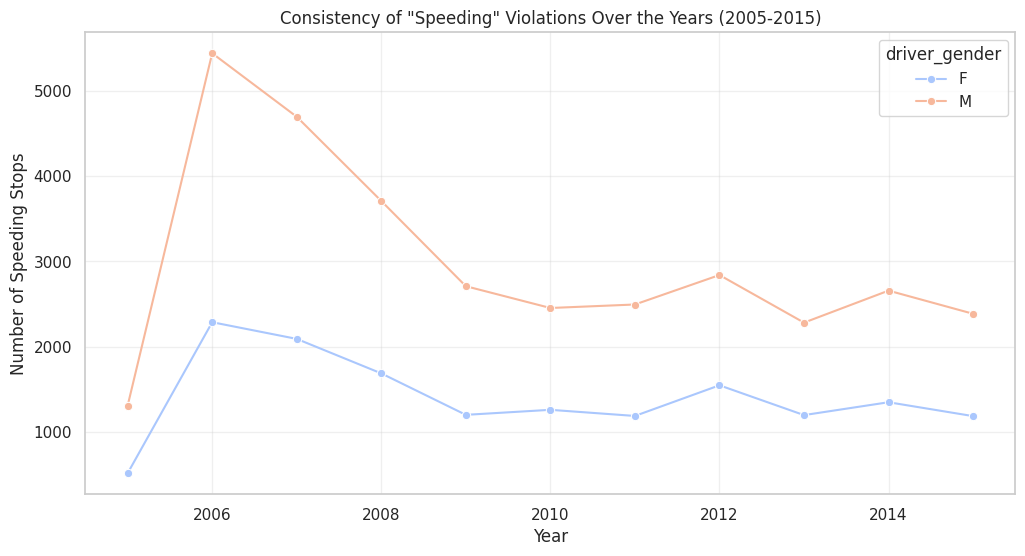

In [12]:
# --- Analysis for Q4.2 ---
# 1. Convert stop_date to datetime to extract the year
valid_data['stop_date'] = pd.to_datetime(valid_data['stop_date'])
valid_data['year'] = valid_data['stop_date'].dt.year

# 2. Check the top violation for every year
# Group by Year, Gender, and Violation
yearly_counts = valid_data.groupby(['year', 'driver_gender', 'violation']).size().reset_index(name='count')

# Sort to find the #1 violation for each year/gender pair
yearly_top = yearly_counts.sort_values(['year', 'driver_gender', 'count'], ascending=[True, True, False]).groupby(['year', 'driver_gender']).head(1)

print("Top Violation for Each Year:")
print(yearly_top[['year', 'driver_gender', 'violation', 'count']])

# Visualization: Trend of Speeding Stops over time
speeding_data = valid_data[valid_data['violation'] == 'Speeding']
yearly_speeding = speeding_data.groupby(['year', 'driver_gender']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_speeding, x='year', y='count', hue='driver_gender', marker='o', palette='coolwarm')
plt.title('Consistency of "Speeding" Violations Over the Years (2005-2015)')
plt.xlabel('Year')
plt.ylabel('Number of Speeding Stops')
plt.grid(True, alpha=0.3)
plt.show()

Yes, the violation is consistent.

Consistency: For every single year recorded in the dataset (2005 through 2015), Speeding remained the number one violation for both male and female drivers. There was no year where another violation (like Equipment or Moving Violations) surpassed Speeding.

Trend Analysis: While the ranking remained constant, the volume of stops fluctuated. We see a distinct peak in speeding stops around 2006-2007 for both genders, followed by a general decline or stabilization in the later years. However, despite these changes in frequency, Speeding consistently remained the primary cause for a police stop.